<a href="https://colab.research.google.com/github/bindu1989/1st-staragile-repository/blob/main/Rapidious_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install Unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.1 MB/s eta 0:00:00


In [5]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=6794cb29a9ba23067b0719d30a5f45230e3f465f394ac16bb6d81e30718a25ed
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [6]:
# import the necessary libraries
import unidecode
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode, array, count, expr

In [17]:
#upload googledrive to access the file
from google.colab import drive

<function google.colab.drive.mount(mountpoint, force_remount=False, timeout_ms=120000, readonly=False)>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [18]:
#get the file path and uploaded in a dataframe
file_path = "/content/drive/MyDrive/Colab Notebooks/epi_r.csv"

df = pd.read_csv(file_path)

#print the head of the dataframe
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Data cleaning
#doiung pleliminary analysis on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [20]:
df.describe()  #it give statistical values of all the columns

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.dtypes #Gives all the data types in each columns

,0
title,object
rating,float64
calories,float64
protein,float64
fat,float64
...,...
cookbooks,float64
leftovers,float64
snack,float64
snack week,float64


In [22]:
#missing values analysis
missing_values = df.isnull().sum()
print(missing_values)

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64


In [23]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

title          0.000000
rating         0.000000
calories      20.531618
protein       20.756034
fat           20.860762
                ...    
cookbooks      0.000000
leftovers      0.000000
snack          0.000000
snack week     0.000000
turkey         0.000000
Length: 680, dtype: float64


In [24]:
#create a summary dataframe for easier visualisation
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
print(missing_summary)

            Missing Values  Missing Percentage
title                    0            0.000000
rating                   0            0.000000
calories              4117           20.531618
protein               4162           20.756034
fat                   4183           20.860762
...                    ...                 ...
cookbooks                0            0.000000
leftovers                0            0.000000
snack                    0            0.000000
snack week               0            0.000000
turkey                   0            0.000000

[680 rows x 2 columns]


In [25]:
#based on the summary drop the rows with NaN values
df = df.dropna()

In [28]:
#checking the updated version
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15864 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 82.4+ MB


In [29]:
#check for duplicated rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
#here i am not removing duplicates because the unique recipies may contain same ingredients

                                                   title  rating  calories  \
521                                  Spiced Pita Toasts    3.750      21.0   
601                               Orange Balsamic Glaze    3.750     194.0   
717                              Garlic Baguette Crumbs    0.000      95.0   
805                            Golden Pineapple Chutney    4.375     262.0   
834                                   Lemon Vinaigrette    3.750     614.0   
...                                                  ...     ...       ...   
20027  Grilled Fillet of Beef with Tomato Ginger Vina...   4.375     738.0   
20032                                 4-3-2-1 Spice Rub    4.375      16.0   
20039                                 Cauliflower Purée    3.125     364.0   
20041                 Chicken with White Wine and Herbs    2.500     843.0   
20045                                 Blueberry Compote    3.750     182.0   

       protein   fat  sodium  #cakeweek  #wasteless  22-minute 

In [79]:
#rename columns by removing 0 character
df.rename(columns=lambda x: x.lstrip('e'), inplace=True)

In [85]:
#normalise column names by removing accents and special characters
df.columns = df.columns.str.replace(' ', "_") #replace spaces with underscores
df.columns = [unidecode.unidecode(col) for col in df.columns] #remove accents and special characters
df.columns = df.columns.str.replace(r'[,._/&#-\*\']', "", regex=True) #convert to lowercase

In [86]:
#removing unnecessary columns
df = df.loc[:, (df !=0).any(axis=0)]
print("Remaining columns:\n", df.columns)

#since this dataset contains 680 columns, i will reduce it by removing the columns where all the row values are equal to 0

Remaining columns:
 Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', 'cakeweek',
       'wasteless', '22-minutemeals', '3-ingredientrecipes',
       ...
       'yellowsquash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'snack', 'snackweek', 'turkey', 'caloriebins'],
      dtype='object', length=648)


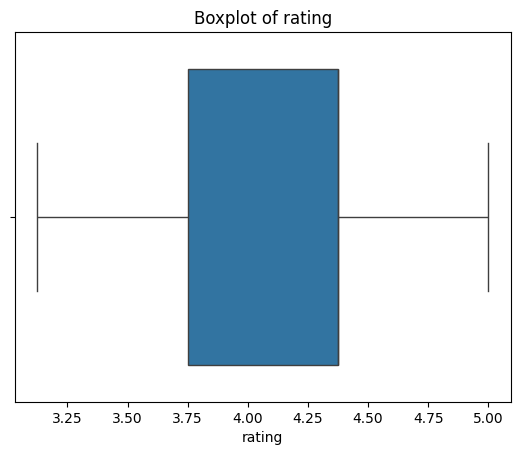

<class 'pandas.core.frame.DataFrame'>
Index: 13959 entries, 1 to 20051
Columns: 648 entries, title to caloriebins
dtypes: category(1), float64(646), object(1)
memory usage: 69.0+ MB


In [87]:
#detecting outliers in the rating column and removing them using boxplot and IQR bounds
sns.boxplot(x=df['rating'])
plt.title("Boxplot of rating")
plt.show()

q1 = df['rating'].quantile(0.25)
q3 = df['rating'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#keep only values within IQR bounds
df = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]

df.shape
df.info()

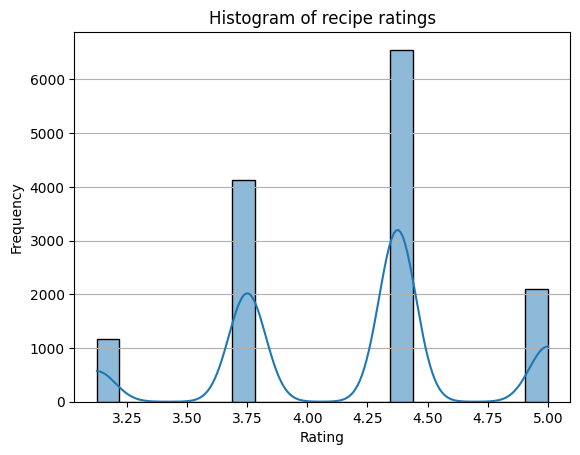

In [88]:
#EXPLORATORY DATA ANALYSIS
#Histogram of recipe ratings: Distribution of recipes
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Histogram of recipe ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

In [89]:
### The dataset is too large so i am going to use PySpark for analysis along with Python
spark = SparkSession.builder \
    .master("local") \
    .appName("RecipeDataAnalysis") \
    .getOrCreate()

In [90]:
#creating a seperate dataframe to use in spark
spark_df = spark.createDataFrame(df)

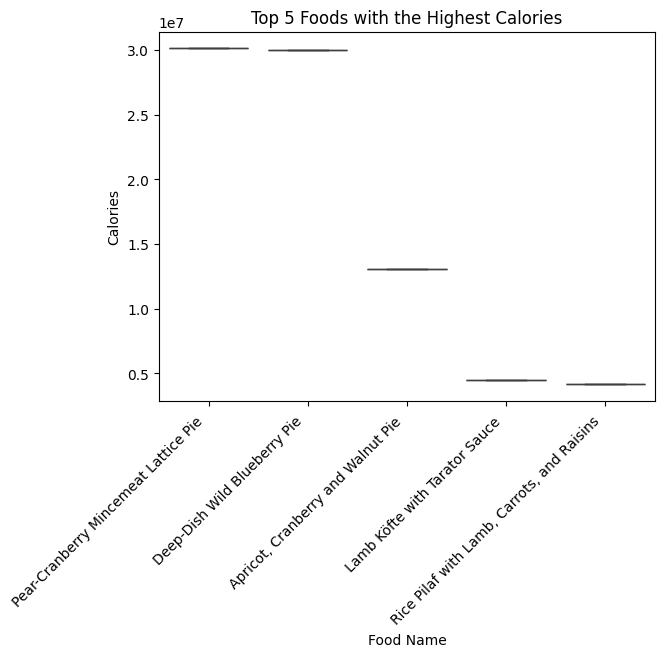

In [91]:
#Extract the top 5 foods with the highest calories
highest_calories_df = spark_df.orderBy(spark_df["calories"].desc()).select("title", "calories").limit(5)

#convert the spark dataframe to pandas dataframe for visualisation
highest_calories_pd = highest_calories_df.toPandas()

#create a bar plot using seaborn
sns.boxplot(x="title", y="calories", data=highest_calories_pd)
plt.title("Top 5 Foods with the Highest Calories")
plt.xlabel("Food Name")
plt.ylabel("Calories")
plt.xticks(rotation=45, ha='right')
plt.show()

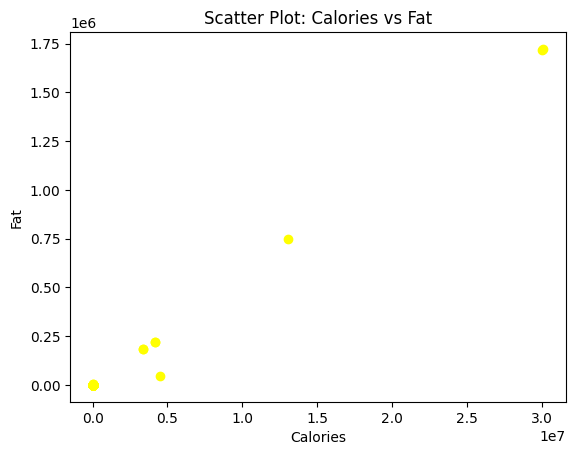

In [92]:
#scatter plot to show the relationship between calories and fat
calories_fat_df = spark_df.select("calories", "fat").toPandas()

#scatter plot for calories vs fat
plt.scatter(calories_fat_df["calories"], calories_fat_df["fat"], color='yellow')
plt.title("Scatter Plot: Calories vs Fat")
plt.xlabel("Calories")
plt.ylabel("Fat")
plt.show()

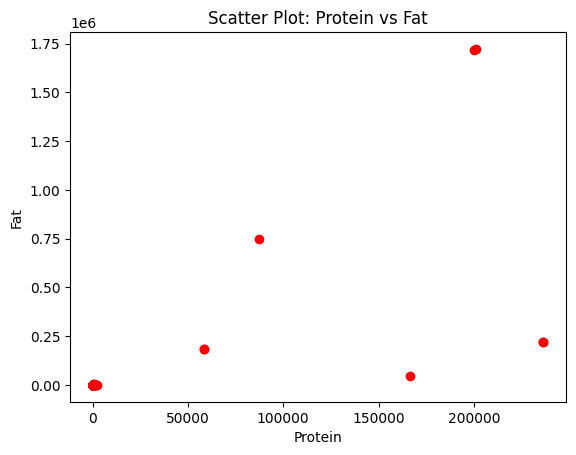

In [93]:
#scatter plot to show the relationship between protein and fat
calories_fat_df = spark_df.select("protein", "fat").toPandas()

#scatter plot for calories vs fat
plt.scatter(calories_fat_df["protein"], calories_fat_df["fat"], color='red')
plt.title("Scatter Plot: Protein vs Fat")
plt.xlabel("Protein")
plt.ylabel("Fat")
plt.show()

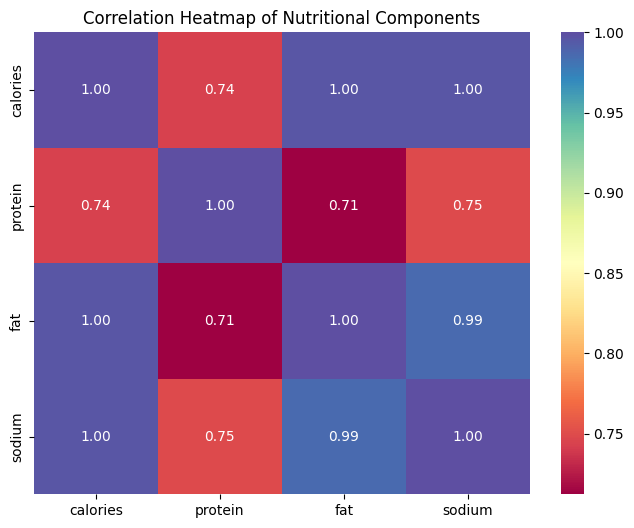

In [94]:
#using heatmap to visualize the correlation between calories, protein, fat and sodium

correlation_matrix = df[['calories', 'protein', 'fat', 'sodium']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Correlation Heatmap of Nutritional Components")
plt.show()
#create a heatmap using seaborn

<ipython-input-95-c396d52b3138>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diet_counts = df.groupby(['calorie_bins', 'vegan']).size().unstack(fill_value=0)


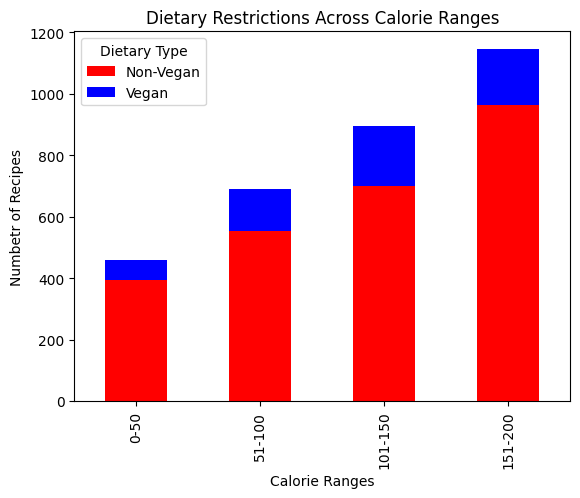

In [95]:
#creating a stacked bar plot to show the proportion of different recipe types
#eg: vegan, vegetarian, accross varipous category ranges
bins = [0, 50, 100, 150, 200]
labels = ['0-50', '51-100', '101-150', '151-200']
df['calorie_bins'] = pd.cut(df['calories'], bins=bins, labels=labels)

#convert the occurencesof each vegan/non vegan in each calorie bin
diet_counts = df.groupby(['calorie_bins', 'vegan']).size().unstack(fill_value=0)

#create a stacked bar plot
diet_counts.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title("Dietary Restrictions Across Calorie Ranges")
plt.xlabel("Calorie Ranges")
plt.ylabel("Numbetr of Recipes")
plt.legend(title='Dietary Type', labels=['Non-Vegan', 'Vegan'])
plt.show()

#result is vegan recipes have lesser calories as compARED TO NON VEGAN recipes

<Figure size 1000x600 with 0 Axes>

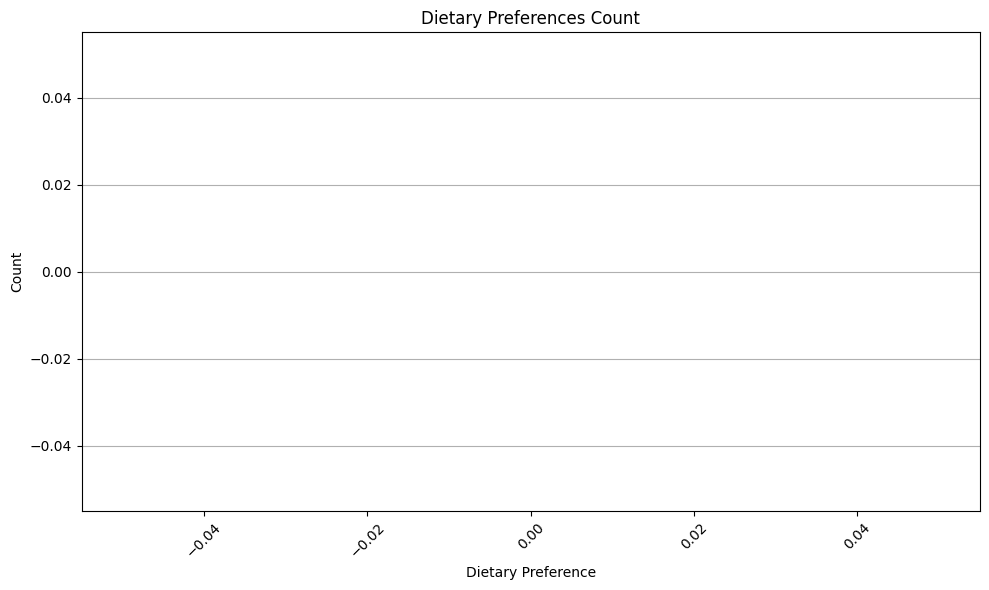

In [96]:
### plotting a graph to depict the count of recipes with relation to dietary restrictions###
#create a list of dietary preference columns
dietary_columns = ["vegan", "vegetarian", "wheatglutenfree", "lowcarb", "dairyfree", "lowsugar", "peanutfree"]

#transform the dataframe to long format using selectexpr
melted_df = spark_df.selectExpr("stack({0}, {1}) as (dietary_preference, is_preferred)".format(len(dietary_columns), ", ".join(["'{0}', '{0}'".format(col_name) for col_name in dietary_columns])))

#filter to keep only the preferred dietary preferences
count_df = melted_df.filter(col("is_preferred") == 1) \
    .groupby("dietary_preference") \
    .agg(count("*").alias("count"))

#collect the results into a pandas dataframe
pandas_df = count_df.toPandas()

#plotting
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.bar(pandas_df['dietary_preference'], pandas_df['count'], color='purple')  # Use square brackets for column names
plt.title("Dietary Preferences Count")
plt.xlabel('Dietary Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

#show the plot
plt.tight_layout()
plt.show()
#peanut free recipes are gaining popularity as compared to other dietary restrictions. low sugar recipes are the least***

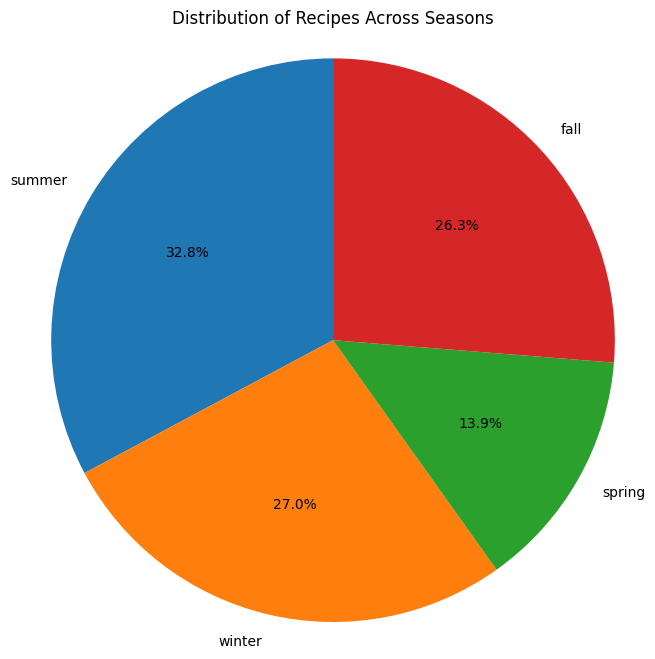

In [97]:
#plotting a pie chart to depict the relationship between seasons and number of recipes
from pyspark.sql.functions import col, sum as spark_sum
#define season columns
season_columns = ["summer", "winter", "spring", "fall"]

#create a new dataframe to sumup the number of recipes in each season
season_counts = spark_df.select([spark_sum(col(season)).alias(season) for season in season_columns]).collect()[0]

#prepare data for plotting
season_labels = season_columns
season_sizes = [season_counts[season] for season in season_columns]

#create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(season_sizes, labels=season_labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Recipes Across Seasons")
plt.axis('equal')

#show the plot
plt.show()

#the majority of recipes are made for summer, with fall and winter coming is closer. the least recipes are in spring.